# Estudo Algoritmo de Classificação - Naive Bayes

In [1]:
import warnings

warnings.filterwarnings('ignore')

## Naive Bayes - Classificador Gaussiano

Ao lidar com dados contínuos, uma suposição típica é que os valores contínuos associados a cada classe são distribuídos de acordo com uma distribuição gaussiana (distribuição normal).

#### Função para plot do gráfico de classificação

In [2]:
import pylab as pl

def plot_classification_results(clf, X, y, title):
    # Divide o dataset em treino e teste
    xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2)

    # Fit dos dados com o classificador
    clf.fit(xTrain, yTrain)

    # Cores para o gráfico
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    h = .02  # step size in the mesh
    
    # Plot da fronteira de decisão.
    # Usando o meshgrid do NumPy e atribuindo uma cor para cada ponto 
    xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
    yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))

    # Previsões
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Resultados em cada cor do plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot dos pontos de dados de treino
    pl.scatter(xTrain[:, 0], xTrain[:, 1], c = yTrain, cmap = cmap_bold)

    y_predicted = clf.predict(xTest)
    score = clf.score(xTest, yTest)
    pl.scatter(xTest[:, 0], xTest[:, 1], c = y_predicted, alpha = 0.5, cmap = cmap_bold)
    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())
    pl.title(title)
    return score

#### Criação de modelo de classificação Gaussiano

0.7222222222222222

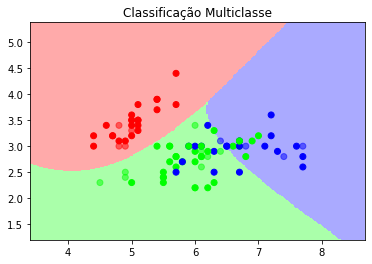

In [3]:
#Import das bibliotecas utilizadas
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap



#Carregamento do dataset Iris
iris = datasets.load_iris()

#Dividindo os dados entre treino e teste
xTrain, xTest, yTrain, yTest = train_test_split(iris.data, iris.target, test_size=0.4)

#Cria o classificador
clf = GaussianNB()

#Cria a visualização do resultado
plot_classification_results(clf, xTrain[:, :2], yTrain, "Classificação Multiclasse")

## Naive Bayes - Classificador Multinomial

O classificador Multinomial Naive Bayes é adequado para classificação com variáveis discretas (por exemplo, contagens de palavras para a classificação de texto). A distribuição multinomial normalmente requer contagens de entidades inteiras. No entanto, na prática, contagens fracionadas como tf-idf também podem funcionar.

Infelizmente, faltou poder de processamento para aplicar os conceitos aprendidos nesse tipo de classificador

## Naive Bayes - Classificador Bernoulli

Assim como MultinomialNB, o classificador BernoulliNB é adequado para dados discretos. A diferença é que enquanto MultinomialNB trabalha com contagens de ocorrência o BernoulliNB é projetado para recursos binários / booleanos.

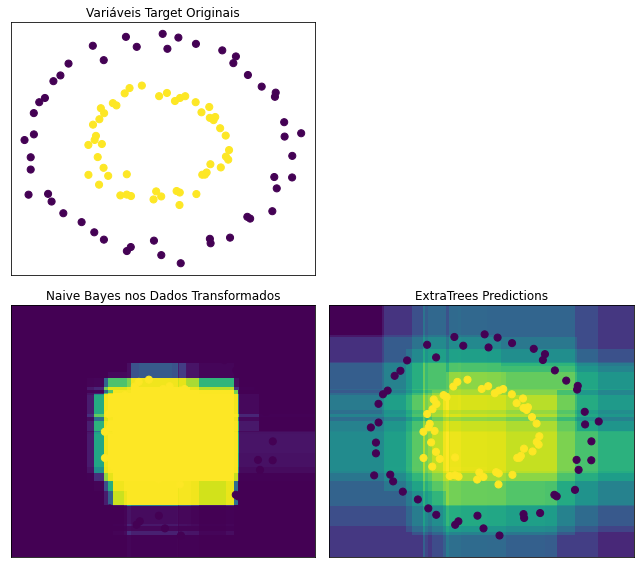

In [4]:
from sklearn.datasets import make_circles
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt


#Gerando dados aleatórios
X, y = make_circles(factor = 0.5, random_state = 0, noise = 0.05)

#Transformando dados com o RandomTreesEmbedding
hasher = RandomTreesEmbedding(n_estimators = 10, random_state = 0, max_depth = 3)
X_transformed = hasher.fit_transform(X)

# Visualizando o resultado após a redução da dimensionalidade com SVD
svd = TruncatedSVD(n_components = 2)
X_reduced = svd.fit_transform(X_transformed)

#Criando um modelo de classificador Naive Bayes e aplicando aos dados transformados
nb = BernoulliNB()
nb.fit(X_transformed, y)

#Criando um modelo de classificador ExtraTreesClassifier para comparar
trees = ExtraTreesClassifier(max_depth = 3, n_estimators = 10, random_state = 0)
trees.fit(X, y)

#Plotar os resultados dos modelos para comparar
fig = plt.figure(figsize=(9, 8))

#Cria o plot dos dados originais
ax = plt.subplot(221)
ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
ax.set_title("Variáveis Target Originais")
ax.set_xticks(())
ax.set_yticks(())

#Plotando o espaço de decisão original e aplicando as cores no MeshGrid
h = .01
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Transforma o Grid usando RandomTreesEmbedding
transformed_grid = hasher.transform(np.c_[xx.ravel(), yy.ravel()])
y_grid_pred = nb.predict_proba(transformed_grid)[:, 1]

ax = plt.subplot(223)
ax.set_title("Naive Bayes nos Dados Transformados")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

#Cria o plot dos dados do ExtraTreesClassifier
y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

ax = plt.subplot(224)
ax.set_title("ExtraTrees Predictions")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50)
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

#Plota os gráficos
plt.tight_layout()
plt.show()

#### Todo código foi construído no curso de Machine Learning da Formação Cientista de Dados da Data Science Academy, durante o capítulo 7 - Classificação com Naive Bayes.